In [1]:
! nvidia-smi

Thu Nov 25 18:25:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

In [24]:
learn = load_learner("/content/export (1).pkl")

In [8]:
upload = widgets.FileUpload()

upload

FileUpload(value={}, description='Upload')

In [14]:
img = PILImage.create(upload.data[-1])

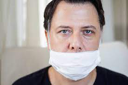

In [15]:
img.to_thumb(128,128)

In [23]:
out = widgets.Output()

out.clear_output() 

with out : display(img.to_thumb(128,128))  
out

Output()

In [25]:
pred = learn.predict(img)

In [26]:
pred

('improper', TensorBase(0), TensorBase([1.0000e+00, 9.9598e-11]))

In [33]:
lbl = widgets.Label()

lbl.value = f"Prediction is {pred[0]} with probability {pred[2]}"

(lbl)

Label(value='Prediction is improper with probability TensorBase([1.0000e+00, 9.9598e-11])')

In [31]:
btn = widgets.Button(description = "classify")

btn

Button(description='classify', style=ButtonStyle())

In [35]:
def on_btn_click(change):
  img = PILImage.create(upload.data[-1])
  out.clear_output()
  with out : display(img.to_thumb(128,128))
  pred = learn.predict(img)
  lbl.value =  f"Prediction is {pred[0]} with probability {pred[2]}"

In [36]:
btn.on_click(on_btn_click)

In [30]:
from ipywidgets import * 

In [39]:
VBox([widgets.Label("Classify whether mask is worn properly"), upload, btn, out, lbl])